## 3.2.1 유튜브 랭킹 데이터 수집하기

In [1]:
# 예제 3-38 라이브러리 추가하기
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [4]:
# 예제 3-39 webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('c:/driver/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

In [5]:
# 예제 3-40 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [32]:
# 예제 3-41 BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [33]:
# 예제 3-42 tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [34]:
# 예제3-43채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [35]:
# 예제 3-44 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [36]:
# 예제 3-45 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [37]:
# 예제 3-46 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

6270만
183억9786만
360개


In [38]:
# 예제 3-47 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 6270만 183억9786만 360개
HYBE LABELS [음악/댄스/가수] 5810만 177억0085만 630개
BANGTANTV [음악/댄스/가수] 5310만 110억7672만 1,525개
SMTOWN [음악/댄스/가수] 2820만 214억6339만 3,714개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2410만 66억0942만 2,738개
1theK (원더케이) [음악/댄스/가수] 2300만 202억6948만 14,726개
JYP Entertainment [음악/댄스/가수] 2130만 133억8615만 1,303개
Coldplay [미분류] 1910만 125억7588만 273개
Mnet K-POP [음악/댄스/가수] 1820만 125억8938만 24,609개
JFlaMusic [음악/댄스/가수] 1720만 33억8775만 279개
KBS WORLD TV [TV/방송] 1640만 121억3144만 51,830개
officialpsy [음악/댄스/가수] 1490만 85억4141만 90개
Jane ASMR 제인 [음식/요리/레시피] 1370만 46억3688만 1,147개
BIGBANG [음악/댄스/가수] 1370만 66억1510만 773개
TWICE [음악/댄스/가수] 1110만 20억6694만 575개
Nao FunFun [키즈/어린이] 1080만 360만 34개
Stone Music Entertainment [음악/댄스/가수] 989만 77억1709만 7,735개
DuDuPopTOY [키즈/어린이] 974만 43억2686만 1,676개
MBCkpop [TV/방송] 937만 72억5144만 40,454개
서은이야기[SeoeunStory] [키즈/어린이] 931만 39억5411만 981개
핑크퐁 (인기 동요・동화) [키즈/어린이] 928만 55억9363만 2,177개
Hongyu ASMR 홍유 [음식/

IndexError: list index out of range

In [39]:
# 예제 3-48 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [40]:
# 예제 3-49 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

In [42]:
# 예제 3-50 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./youtube_rank.xlsx', index = False)

## 3.2.2 유튜브 랭킹 데이터 시각화하기

In [43]:
# 예제 3-51 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# 예제 3-52 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [46]:
# 예제 3-53 엑셀 파일 불러오기
df = pd.read_excel('./youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6270만,183억9786만,360개
1,HYBE LABELS,[음악/댄스/가수],5810만,177억0085만,630개
2,BANGTANTV,[음악/댄스/가수],5310만,110억7672만,"1,525개"
3,SMTOWN,[음악/댄스/가수],2820만,214억6339만,"3,714개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [47]:
# 예제 3-54 데이터 살펴보기
df.tail()

,title,category,subscriber,view,video
995,김흥미,[미분류],49만,1억9346만,445개
996,KBS 1라디오,[TV/방송],49만,1억7331만,"9,680개"
997,주키니TV,[게임],49만,1억6464만,414개
998,공구왕황부장,[취미/라이프],49만,9787만,433개
999,도아TV,[BJ/인물/연예인],49만,1억8203만,"1,550개"


In [48]:
# 예제 3-55 데이터 살펴보기
df['subscriber'][0:10]

0    6270만
1    5810만
2    5310만
3    2820만
4    2650만
5    2410만
6    2300만
7    2130만
8    1910만
9    1820만
Name: subscriber, dtype: object

In [49]:
# 예제 3-56 데이터 살펴보기
df['subscriber'].str.replace('만', '0000')[0:10]

0    62700000
1    58100000
2    53100000
3    28200000
4    26500000
5    24100000
6    23000000
7    21300000
8    19100000
9    18200000
Name: subscriber, dtype: object

In [50]:
# 예제 3-57 replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6270만,183억9786만,360개,62700000
1,HYBE LABELS,[음악/댄스/가수],5810만,177억0085만,630개,58100000
2,BANGTANTV,[음악/댄스/가수],5310만,110억7672만,"1,525개",53100000
3,SMTOWN,[음악/댄스/가수],2820만,214억6339만,"3,714개",28200000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [51]:
# 예제 3-58 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [52]:
# 예제 3-59 Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [53]:
# 예제 3-60 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],98370000,73
[IT/기술/컴퓨터],7760000,8
[TV/방송],226400000,147
[게임],70070000,81
[교육/강의],22440000,21


In [54]:
# 예제 3-61 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],98370000,73
[IT/기술/컴퓨터],7760000,8
[TV/방송],226400000,147
[게임],70070000,81
[교육/강의],22440000,21


In [55]:
# 예제3-62 데이터프레임의인덱스초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],98370000,73
1,[IT/기술/컴퓨터],7760000,8
2,[TV/방송],226400000,147
3,[게임],70070000,81
4,[교육/강의],22440000,21


In [56]:
# 예제3-63 데이터프레임을내림차순정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],660420000,172
17,[키즈/어린이],259740000,90
2,[TV/방송],226400000,147
11,[음식/요리/레시피],175460000,85
7,[미분류],101630000,100


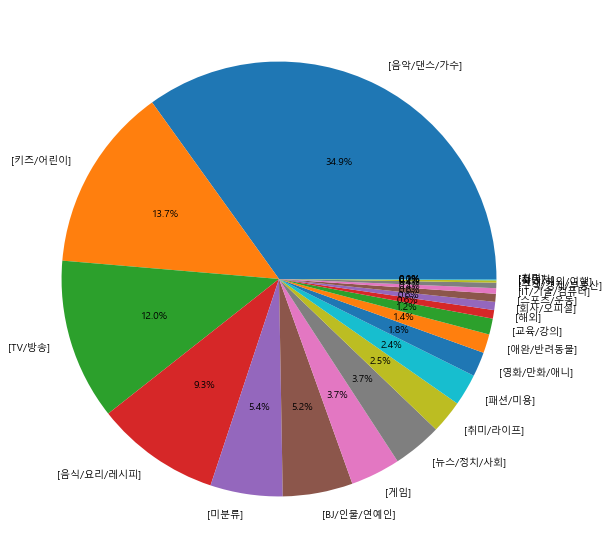

In [57]:
# 예제3-64 카테고리별구독자수시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

In [58]:
# 예제 3-65 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)

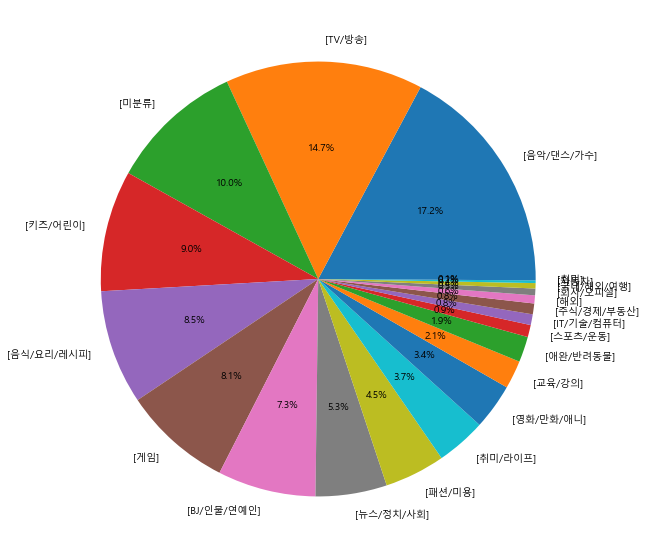

In [59]:
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()